Linear Regression - RMSE: 2.4928076611611645, MAE: 6.214090035543796, R²: 0.9987232350045929
Decision Tree - RMSE: 2.885868874724367, MAE: 8.328239162102886, R²: 0.9973992662684976
Random Forest - RMSE: 2.49101316532406, MAE: 6.205146589817793, R²: 0.9986238758589067
Gradient Boosting - RMSE: 2.4527742198917726, MAE: 6.016101373765694, R²: 0.998701432406209
XGBoost - RMSE: 2.579161031513822, MAE: 6.652071626479442, R²: 0.9983682171783683
SVR - RMSE: 14.018854711202389, MAE: 196.52828741380142, R²: -0.19880548759859296
Top 1 Model: Gradient Boosting with RMSE: 2.4527742198917726
Top 2 Model: Random Forest with RMSE: 2.49101316532406


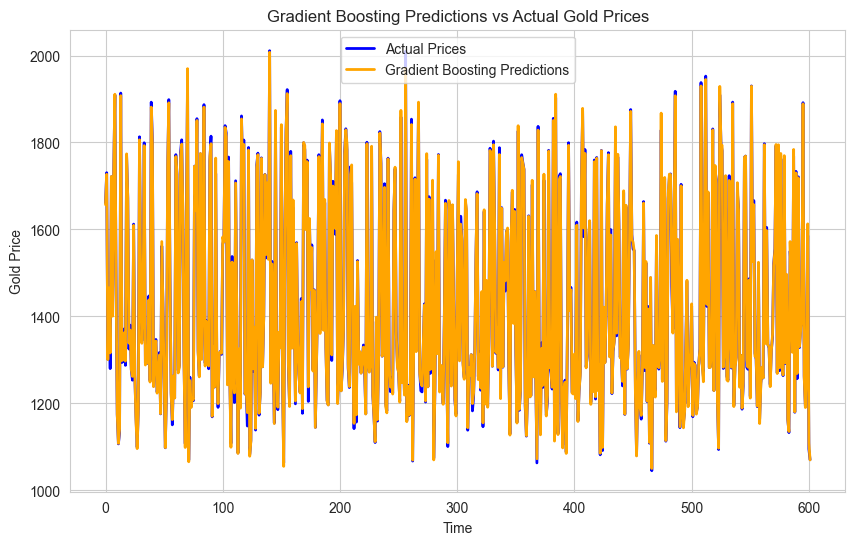

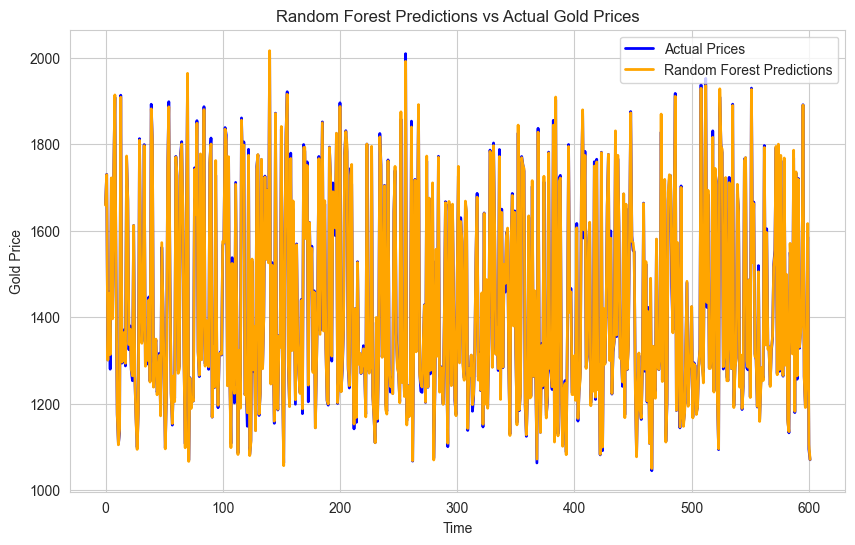

In [133]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

sns.set_style('whitegrid')

# -----------------------------------------------
# Load the dataset
# -----------------------------------------------
df = pd.read_csv("../data/gold_data_clean.csv", skiprows=1)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = df.dropna(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['Date'])

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

# Normalize the data
train_size = int(len(df['Close'].values) * 0.8)
train_data = df['Close'].values[:train_size]
test_data = df['Close'].values[train_size:]

# Prepare data for non-LSTM models
X = df[['Open', 'High', 'Low', 'Volume']].fillna(0).values
y = df['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X[:train_size], y[:train_size], test_size=0.2, random_state=42)

# Dictionary to store models and their RMSEs
model_rmses = {}

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR()
}

# Train the models
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate RMSE, MAE, and R²
    rmse = np.sqrt(mean_absolute_error(y_test, predictions))
    mae = np.mean(np.abs(y_test - predictions))
    r2 = model.score(X_test, y_test)

    # Store model and its RMSE in a dictionary
    model_rmses[name] = (model, rmse)

    print(f"{name} - RMSE: {rmse}, MAE: {mae}, R²: {r2}")

# Select top 2 models with the lowest RMSE
best_models = sorted(model_rmses.items(), key=lambda x: x[1][1])[:2]

# Print the details of the best models
for i, (model_name, (model, rmse)) in enumerate(best_models, start=1):
    print(f"Top {i} Model: {model_name} with RMSE: {rmse}")


# Plotting the top models' predictions vs actual
for model_name, (model, rmse) in best_models:
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="Actual Prices", color='blue', linewidth=2)
    plt.plot(predictions, label=f"{model_name} Predictions", color='orange', linewidth=2)
    plt.title(f"{model_name} Predictions vs Actual Gold Prices")
    plt.xlabel("Time")
    plt.ylabel("Gold Price")
    plt.legend()
    plt.grid(True)
    plt.show()


In [134]:
# -----------------------------------------------
# MLflow Logging for Top 1 Model: Gradient Boosting
# -----------------------------------------------
with mlflow.start_run(run_name="Top 1 Model: Gradient Boosting"):
    # Log model-specific parameters
    mlflow.log_params(models["Gradient Boosting"].get_params())

    # Log additional metadata
    mlflow.set_tag("model_name", "Gradient Boosting")
    mlflow.set_tag("evaluation_metric", "RMSE")

    # Evaluate the model
    predictions = models["Gradient Boosting"].predict(X_test)
    rmse = np.sqrt(mean_absolute_error(y_test, predictions))
    mae = np.mean(np.abs(y_test - predictions))
    r2 = models["Gradient Boosting"].score(X_test, y_test)

    # Log metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)

    # Log input data details
    mlflow.set_tag("train_features", 'Open, High, Low, Volume')
    mlflow.set_tag("train_label", 'Close')

    # Log the trained model
    mlflow.sklearn.log_model(models["Gradient Boosting"], artifact_path="models")
    
    print(f"Logged Gradient Boosting Model to MLflow with RMSE: {rmse}")


2024/12/18 00:57:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Gradient Boosting Model to MLflow with RMSE: 2.4527742198917726
🏃 View run Top 1 Model: Gradient Boosting at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/f8419d5fa9db40bb9e68047a508baa29
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


In [135]:
# -----------------------------------------------
# MLflow Logging for Top 2 Model: Random Forest
# -----------------------------------------------
with mlflow.start_run(run_name="Top 2 Model: Random Forest"):
    # Log model-specific parameters
    mlflow.log_params(models["Random Forest"].get_params())

    # Log additional metadata
    mlflow.set_tag("model_name", "Random Forest")
    mlflow.set_tag("evaluation_metric", "RMSE")

    # Evaluate the model
    predictions = models["Random Forest"].predict(X_test)
    rmse = np.sqrt(mean_absolute_error(y_test, predictions))
    mae = np.mean(np.abs(y_test - predictions))
    r2 = models["Random Forest"].score(X_test, y_test)

    # Log metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)

    # Log input data details
    mlflow.set_tag("train_features", 'Open, High, Low, Volume')
    mlflow.set_tag("train_label", 'Close')

    # Log the trained model
    mlflow.sklearn.log_model(models["Random Forest"], artifact_path="models")
    
    print(f"Logged Random Forest Model to MLflow with RMSE: {rmse}")


2024/12/18 00:58:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest Model to MLflow with RMSE: 2.49101316532406
🏃 View run Top 2 Model: Random Forest at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/4e9efd03f5a64f338ba623716bc4813d
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


In [139]:
all_experiments = [exp.experiment_id for exp in mlflow.search_experiments()]
df_mlflow = mlflow.search_runs(experiment_ids=all_experiments, filter_string="metrics.RMSE<10")

# Correct column reference
run_id = df_mlflow.loc[df_mlflow['metrics.RMSE'].idxmax()]['run_id']

print(f"The run ID with the highest RMSE under 10 is: {run_id}")


The run ID with the highest RMSE under 10 is: 4e9efd03f5a64f338ba623716bc4813d


In [140]:
df_mlflow

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.R2,metrics.MAE,metrics.RMSE,params.min_weight_fraction_leaf,...,params.n_iter_no_change,tags.train_label,tags.mlflow.user,tags.evaluation_metric,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.source.name,tags.model_name,tags.mlflow.runName,tags.train_features
0,4e9efd03f5a64f338ba623716bc4813d,1,FINISHED,mlflow-artifacts:/99d6815f2b6f4039a049a73b9ea1...,2024-12-17 23:58:09.291000+00:00,2024-12-17 23:59:00.765000+00:00,0.998624,6.205147,2.491013,0.0,...,None,Close,hentatiamin0,RMSE,"[{""run_id"": ""4e9efd03f5a64f338ba623716bc4813d""...",LOCAL,C:\Users\henta\AppData\Local\Programs\Python\P...,Random Forest,Top 2 Model: Random Forest,"Open, High, Low, Volume"
1,f8419d5fa9db40bb9e68047a508baa29,1,FINISHED,mlflow-artifacts:/99d6815f2b6f4039a049a73b9ea1...,2024-12-17 23:57:08.152000+00:00,2024-12-17 23:57:18.159000+00:00,0.998701,6.016101,2.452774,0.0,...,None,Close,hentatiamin0,RMSE,"[{""run_id"": ""f8419d5fa9db40bb9e68047a508baa29""...",LOCAL,C:\Users\henta\AppData\Local\Programs\Python\P...,Gradient Boosting,Top 1 Model: Gradient Boosting,"Open, High, Low, Volume"


In [141]:
print(df_mlflow.columns)


Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.R2', 'metrics.MAE', 'metrics.RMSE',
       'params.min_weight_fraction_leaf', 'params.max_features',
       'params.monotonic_cst', 'params.max_leaf_nodes', 'params.verbose',
       'params.random_state', 'params.oob_score', 'params.criterion',
       'params.n_estimators', 'params.max_depth', 'params.min_samples_leaf',
       'params.n_jobs', 'params.min_samples_split',
       'params.min_impurity_decrease', 'params.warm_start', 'params.ccp_alpha',
       'params.bootstrap', 'params.max_samples', 'params.init', 'params.loss',
       'params.subsample', 'params.alpha', 'params.tol',
       'params.learning_rate', 'params.validation_fraction',
       'params.n_iter_no_change', 'tags.train_label', 'tags.mlflow.user',
       'tags.evaluation_metric', 'tags.mlflow.log-model.history',
       'tags.mlflow.source.type', 'tags.mlflow.source.name', 'tags.model_name',
       'tags.mlflow.runName

In [108]:
# Import necessary libraries
import mlflow
import mlflow.sklearn
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

sns.set_style('whitegrid')



In [109]:
# -----------------------------------------------
# Load environment variables
# -----------------------------------------------
load_dotenv("../.env")
DagsHub_username = os.getenv("DagsHub_username")
DagsHub_token = os.getenv("DagsHub_token")
os.environ['MLFLOW_TRACKING_USERNAME'] = DagsHub_username
os.environ["MLFLOW_TRACKING_PASSWORD"] = DagsHub_token

mlflow.set_tracking_uri(f"https://dagshub.com/{DagsHub_username}/gold-price-prediction.mlflow")
mlflow.set_experiment("Gold Price Prediction")



<Experiment: artifact_location='mlflow-artifacts:/99d6815f2b6f4039a049a73b9ea1e45a', creation_time=1734457037991, experiment_id='1', last_update_time=1734457037991, lifecycle_stage='active', name='Gold Price Prediction', tags={}>

In [112]:
# -----------------------------------------------
# Load the dataset
# -----------------------------------------------
df = pd.read_csv("../data/gold_data_clean.csv", skiprows=1)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = df.dropna(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['Date'])

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

# Normalize the data
train_size = int(len(df['Close'].values) * 0.8)
train_data = df['Close'].values[:train_size]
test_data = df['Close'].values[train_size:]

# Prepare data for non-LSTM models
X = df[['Open', 'High', 'Low', 'Volume']].fillna(0).values
y = df['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X[:train_size], y[:train_size], test_size=0.2, random_state=42)



2024/12/17 20:22:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression - RMSE: 2.4928076611611645, MAE: 6.214090035543796, R²: 0.9987232350045929
🏃 View run Linear Regression at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/4acbdfb7b1104165bef9f439e6bd7065
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


2024/12/17 20:22:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree - RMSE: 2.868693669986881, MAE: 8.2294033722228, R²: 0.9974603949245947
🏃 View run Decision Tree at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/ebc59ab82a734682ad5c07e81ca6488f
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


2024/12/17 20:22:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest - RMSE: 2.4991092941940822, MAE: 6.245547264327243, R²: 0.9986075548905948
🏃 View run Random Forest at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/9d097e37d55b4f6596dfefab61b0edc0
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


2024/12/17 20:23:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting - RMSE: 2.4531800173350367, MAE: 6.018092197451931, R²: 0.9987121109937259
🏃 View run Gradient Boosting at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/215864cd31f34be59b1d0818e25f0ea5
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


2024/12/17 20:23:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost - RMSE: 2.579161031513822, MAE: 6.652071626479442, R²: 0.9983682171783683
🏃 View run XGBoost at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/4325821e47ff44b3903dfbc0fc47e3b7
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


2024/12/17 20:23:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Top Model Gradient Boosting logged with RMSE: 2.4531800173350367
🏃 View run Gradient Boosting_best_model at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/8e563023b662487baba9ae8037047a0b
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


2024/12/17 20:23:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Top Model Linear Regression logged with RMSE: 2.4928076611611645
🏃 View run Linear Regression_best_model at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/4a6655cef2da47a0aaa2b2d2d6008879
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


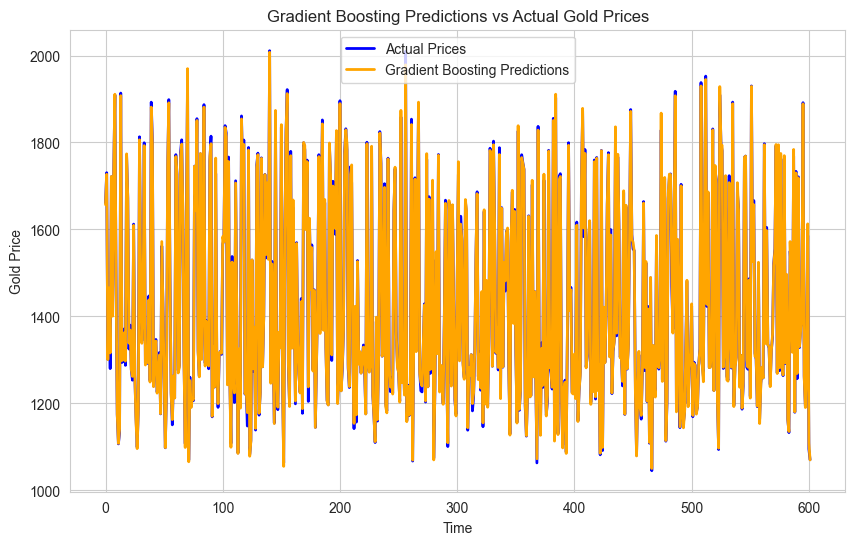

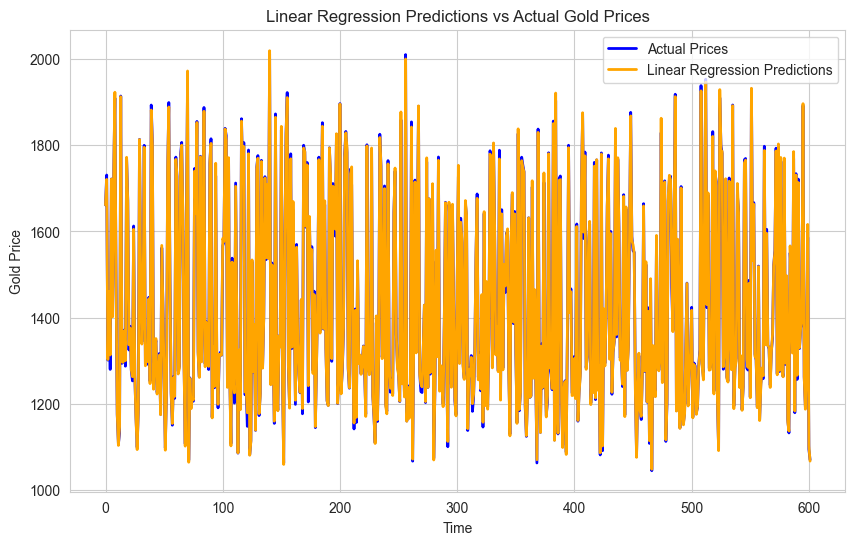

In [118]:
# Dictionary to store models and their RMSEs
model_rmses = {}

# Visualizing Predictions for Other Models
# -----------------------------------------------
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Fit the model
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate RMSE, MAE, and R²
        rmse = np.sqrt(mean_absolute_error(y_test, predictions))
        mae = np.mean(np.abs(y_test - predictions))
        r2 = model.score(X_test, y_test)

        # Log parameters, metrics, and model
        mlflow.log_params(model.get_params())
        mlflow.log_metrics({"RMSE": rmse, "MAE": mae, "R²": r2})
        mlflow.sklearn.log_model(model, "models/sklearn_model")

        # Store model and its RMSE in a dictionary
        model_rmses[name] = (model, rmse)

        print(f"{name} - RMSE: {rmse}, MAE: {mae}, R²: {r2}")

# Select top 2 models with the lowest RMSE
best_models = sorted(model_rmses.items(), key=lambda x: x[1][1])[:2]

# Log the top 2 models to MLflow
for model_name, (model, rmse) in best_models:
    with mlflow.start_run(run_name=f"{model_name}_best_model"):
        mlflow.log_params(model.get_params())
        mlflow.log_metrics({"RMSE": rmse})
        mlflow.sklearn.log_model(model, f"models/{model_name}")
        print(f"Top Model {model_name} logged with RMSE: {rmse}")

# Plotting the top models' predictions vs actual
for model_name, (model, rmse) in best_models:
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="Actual Prices", color='blue', linewidth=2)
    plt.plot(predictions, label=f"{model_name} Predictions", color='orange', linewidth=2)
    plt.title(f"{model_name} Predictions vs Actual Gold Prices")
    plt.xlabel("Time")
    plt.ylabel("Gold Price")
    plt.legend()
    plt.grid(True)
    plt.show()


In [119]:
# Section 1: GradientBoostingRegressor
# ---------------------------------------------------------

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to test
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Grid search for GradientBoosting
model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=1
)

# Fit the model with GridSearch
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions and evaluate
predictions = best_model.predict(X_test)
rmse = np.sqrt(mean_absolute_error(y_test, predictions))

print(f"Gradient Boosting RMSE: {rmse}")
print(f"Best Hyperparameters: {best_params}")

# Log everything to MLflow
with mlflow.start_run(run_name="GradientBoosting_tuned"):
    mlflow.log_params(best_params)
    mlflow.log_metrics({"RMSE": rmse})
    mlflow.sklearn.log_model(best_model, "GradientBoosting_tuned")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Gradient Boosting RMSE: 2.430420342596634
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


2024/12/17 20:28:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoosting_tuned at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/2f5165f84a16459dab607d0926c16cfc
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


Fitting 5 folds for each of 4 candidates, totalling 20 fits


2024/12/17 20:42:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Hyperparameters: {'regressor__copy_X': True, 'regressor__fit_intercept': True}
RMSE: 0.26758742323942186
R² Score: 0.9999990299484208


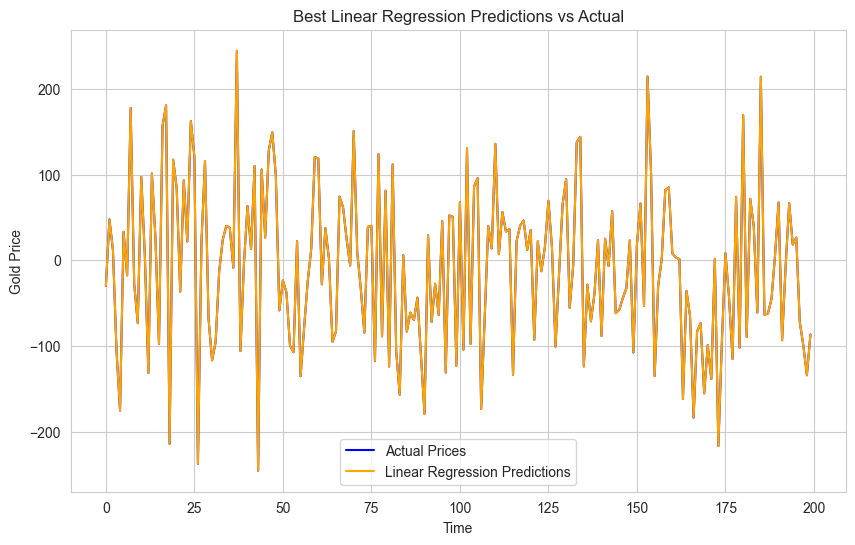

🏃 View run Linear Regression GridSearch at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1/runs/15eb73de5770407e81486a64630e12d8
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/1


In [128]:
# Define hyperparameters to search over for Linear Regression
param_grid_lr = {
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False]
}

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Set up GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_lr,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Start MLflow run for Grid Search
with mlflow.start_run(run_name="Linear Regression GridSearch"):
    # Fit GridSearchCV on the training data
    grid_search_lr.fit(X_train, y_train)

    # Get the best model and hyperparameters
    best_lr_model = grid_search_lr.best_estimator_
    best_params = grid_search_lr.best_params_
    best_rmse = np.sqrt(mean_absolute_error(y_test, best_lr_model.predict(X_test)))
    best_r2 = best_lr_model.score(X_test, y_test)

    # Log the best hyperparameters and evaluation metrics
    mlflow.log_params(best_params)
    mlflow.log_metrics({"RMSE": best_rmse, "R²": best_r2})
    mlflow.sklearn.log_model(best_lr_model, "linear_regression_best")

    print(f"Best Hyperparameters: {best_params}")
    print(f"RMSE: {best_rmse}")
    print(f"R² Score: {best_r2}")

    # Plotting actual vs predictions
    predictions = best_lr_model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="Actual Prices", color='blue')
    plt.plot(predictions, label=f"Linear Regression Predictions", color='orange')
    plt.title(f"Best Linear Regression Predictions vs Actual")
    plt.xlabel("Time")
    plt.ylabel("Gold Price")
    plt.legend()
    plt.grid(True)
    plt.show()


In [130]:
print(df_mlflow.columns)


NameError: name 'df_mlflow' is not defined